<a href="https://colab.research.google.com/github/AmirKh20/Computer-Vision-Assignments/blob/master/Pose_Estimation_Using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pose Estimation Using OpenCV

Author: Amir Khayatzadeh

Supervisor: Dr. Shabnam Shadroo

## Abstract

In this paper, we are going to use OpenCV functions to do some preprocessing for human pose estimatation. Prior works have done better jobs with multiple deep neural networks [1] and [2], but we are going to do only some preprocessing steps using the OpenCV library.

## Introduction

Human pose estimation is an important task in computer vision, which aims to estimate the positions of body joints from images. This task is mostly done using heatmap-based methods or coordinate vectors, but in [1], they used compositional tokens to estimate body joints dependently. As a result, they got better outputs in occluded scenes. However, in this report, we are doing a simple task to only preprocess the detection of humans and their heads.

## Preprocessing

### Body Detection

First of all, we are using the MPII Human Pose Dataset [3], which includes around 25K images containing over 40K people.

In [ ]:
import cv2

In [ ]:
img1 = cv2.imread("images/000001163.jpg")

In [ ]:
from google.colab.patches import cv2_imshow

This is the first image that we are going to work on.

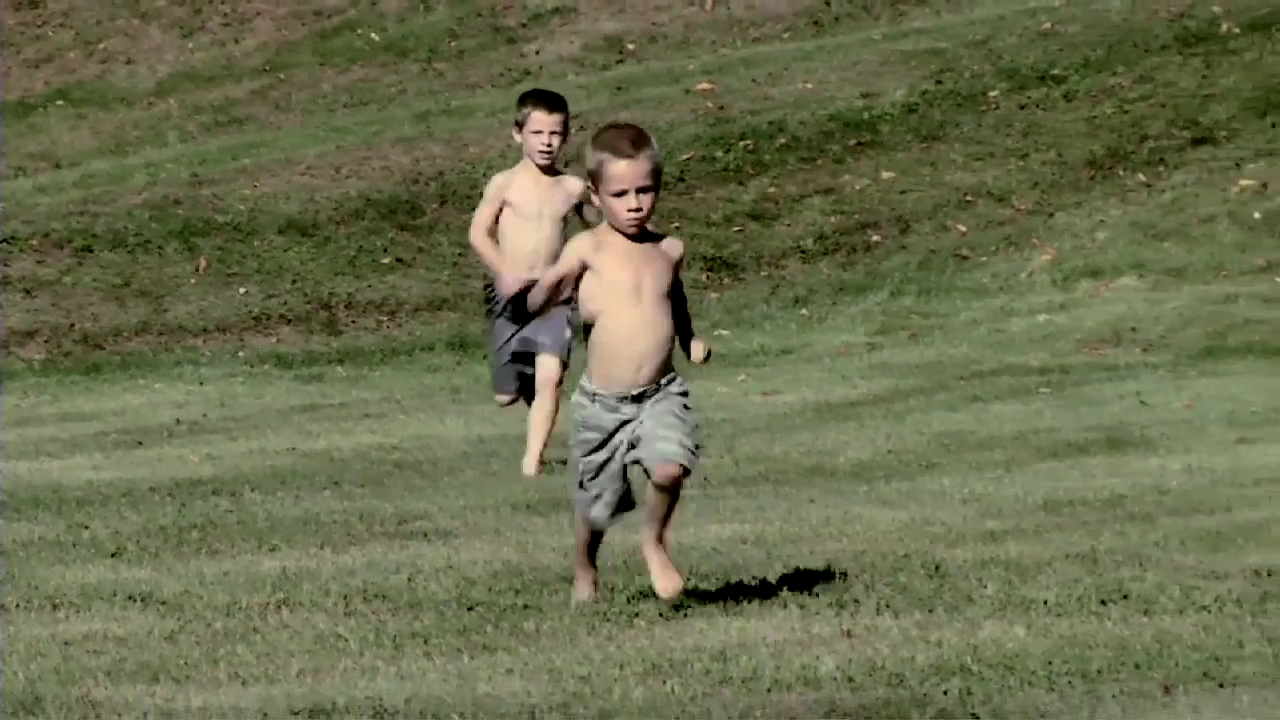

In [ ]:
cv2_imshow(img1)

We need to resize it to its half size.

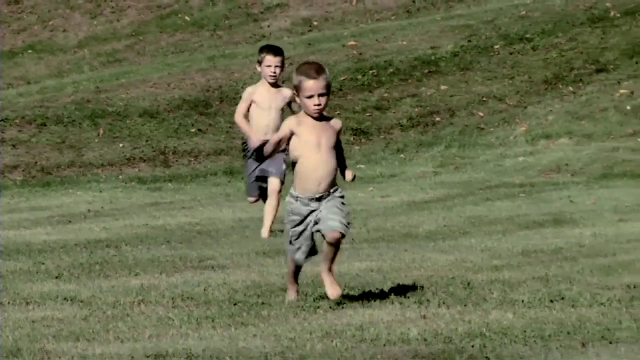

In [ ]:
img1 = cv2.resize(img1, (0, 0), fx=0.5, fy=0.5)
cv2_imshow(img1)

Then turning the image into grayscale.

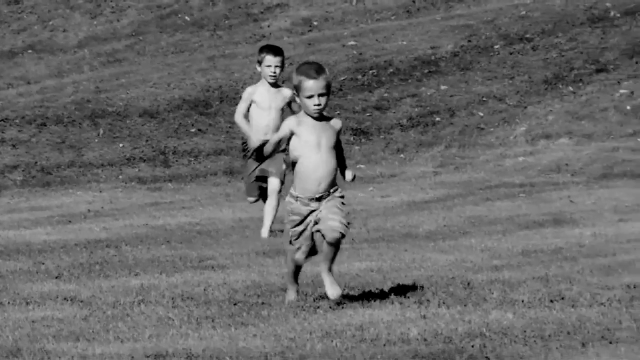

In [ ]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
cv2_imshow(img1_gray)

After some tests on other filters, we are going to use the bilateral filter to blur the background noise in the image and keep the edges, using the following arguments: d=9 to have heavy noise filtering, sigmaColor and sigmaSpace equals to 50.

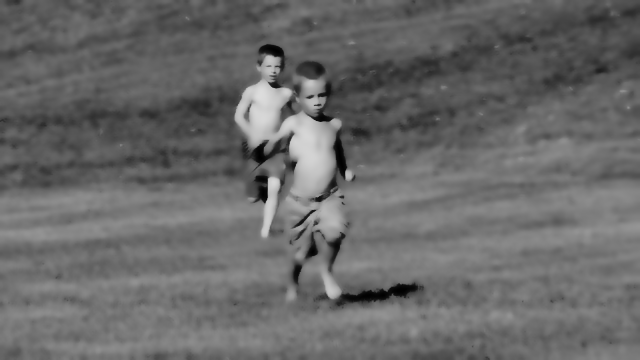

In [ ]:
img1_blur = cv2.bilateralFilter(img1_gray, 9, 50, 50)
cv2_imshow(img1_blur)

Morphological operations on edges did not give us fine results, as it is shown in the third image that has a contour with two human body and a shadow.

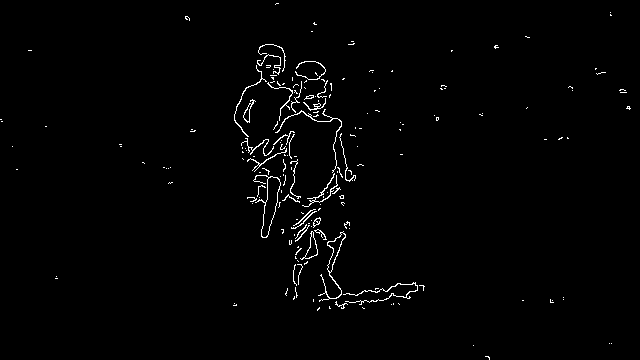

In [ ]:
img1_edges = cv2.Canny(img1_blur, 100, 100)
cv2_imshow(img1_edges)

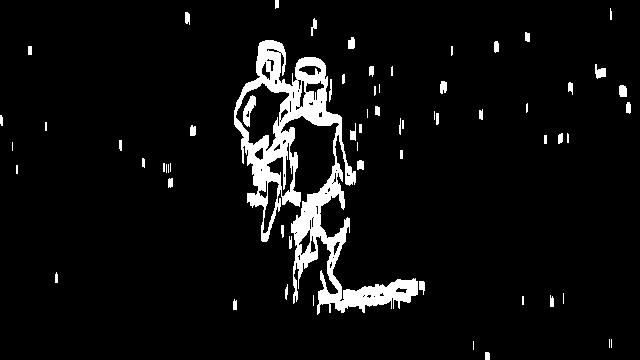

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,5))
morph = cv2.morphologyEx(cv2.Canny(img1_blur, 100, 100), cv2.MORPH_DILATE, kernel, iterations=2)
cv2_imshow(morph)

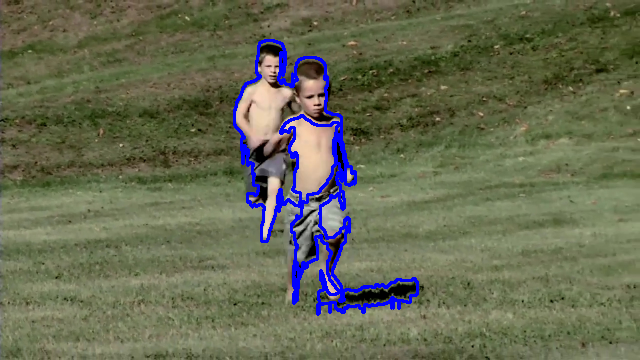

In [ ]:
contours, h = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours = sorted(contours, reverse=True, key=cv2.contourArea)

img_copy = img1.copy()
cv2_imshow(cv2.drawContours(img_copy, sorted_contours, 0, (255, 0, 0), 2))

Therefore, instead, we are going to use thresholding and then dilate the resultant image.

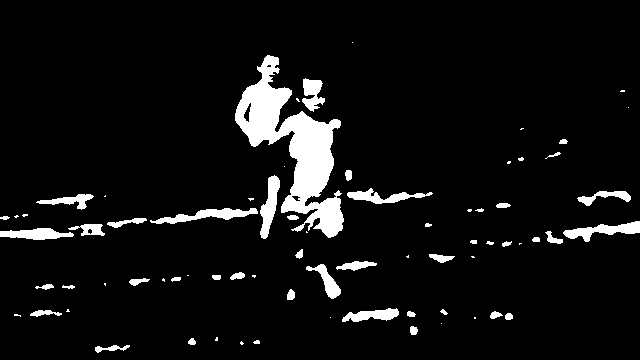

In [ ]:
_, mask = cv2.threshold(img1_blur, 135, 255, cv2.THRESH_BINARY)
cv2_imshow(mask)

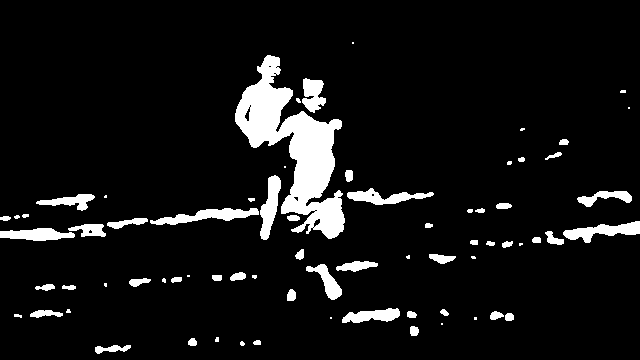

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
morph = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel, iterations=1)
cv2_imshow(morph)

Using the opening operation, many of the noises will get rid off.

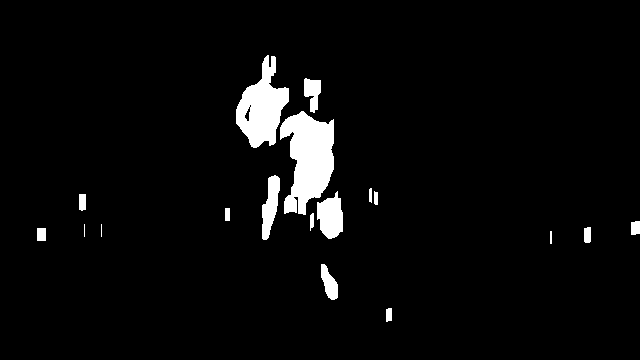

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,5))
morph2 = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel, iterations=3)
cv2_imshow(morph2)

And, with the closing operation, the unconnected contours will get connected making them one contour. We are using a 1 by 10 rectangle as a kernel to make sure the contours are connected vertically.

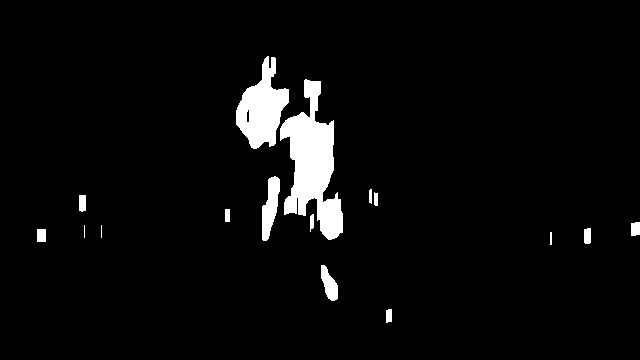

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,10))
morph3 = cv2.morphologyEx(morph2, cv2.MORPH_CLOSE, kernel, iterations=1)
cv2_imshow(morph3)

At last, we draw all the contours that have an area with more than 100.

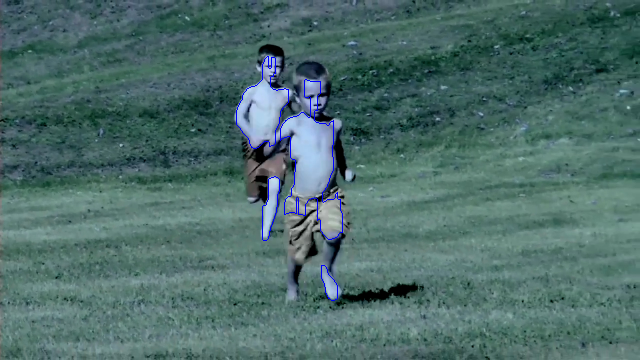

In [ ]:
contours, h = cv2.findContours(morph3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

img1_copy = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

for cnt in contours:
  if cv2.contourArea(cnt) > 100:
    cv2.drawContours(img1_copy, [cnt], -1, (255, 0, 0), 1)

cv2_imshow(img1_copy)

We are going to do all of past operations on another image from the MPII Human Pose Dataset [3]

In [ ]:
img2 = cv2.imread("images/000015774.jpg")

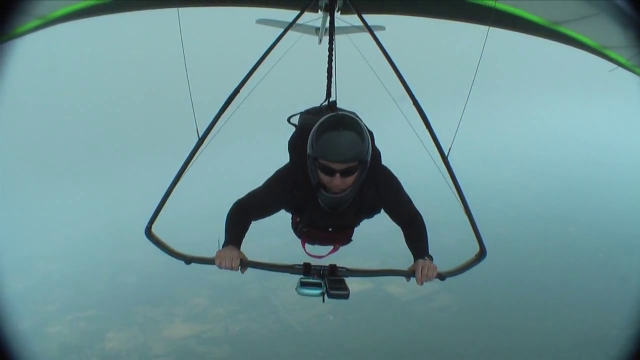

In [ ]:
img2 = cv2.resize(img2, (0, 0), fx=0.5, fy=0.5)
cv2_imshow(img2)

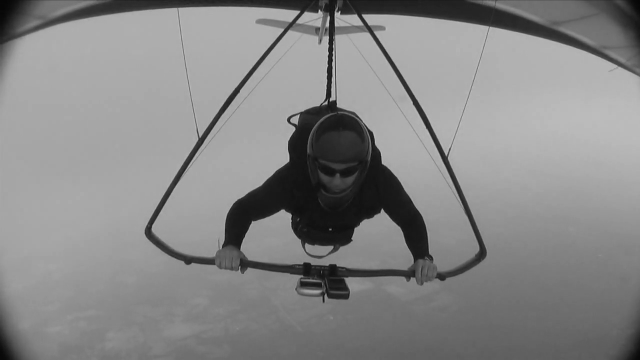

In [ ]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
cv2_imshow(img2_gray)

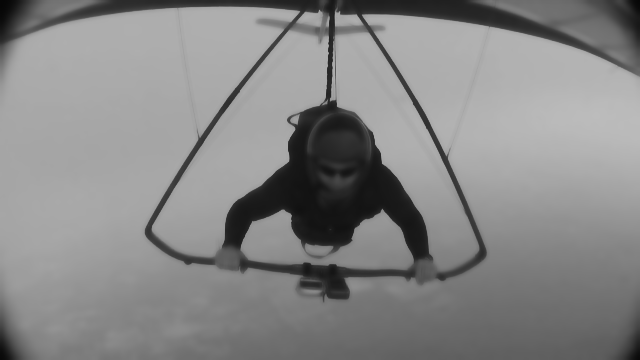

In [ ]:
img2_blur = cv2.bilateralFilter(img2_gray, 9, 50, 50)
cv2_imshow(img2_blur)

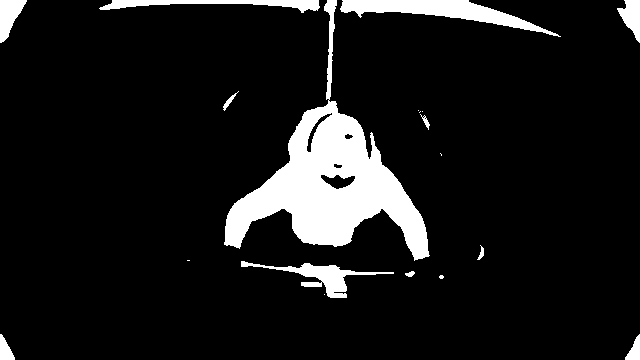

In [ ]:
_, mask = cv2.threshold(img2_blur, 50, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(mask)

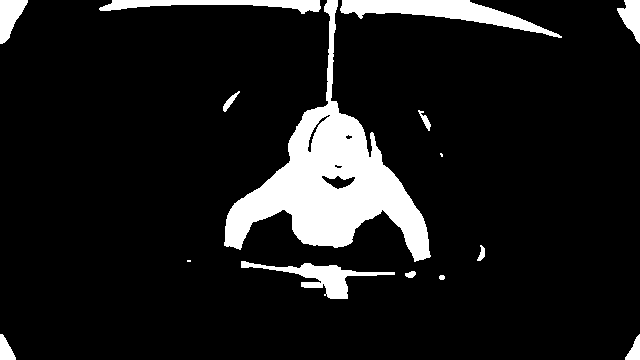

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
morph = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel, iterations=1)
cv2_imshow(morph)

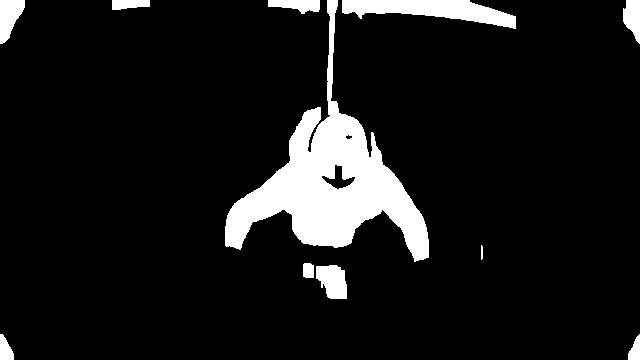

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,5))
morph2 = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel, iterations=3)
cv2_imshow(morph2)

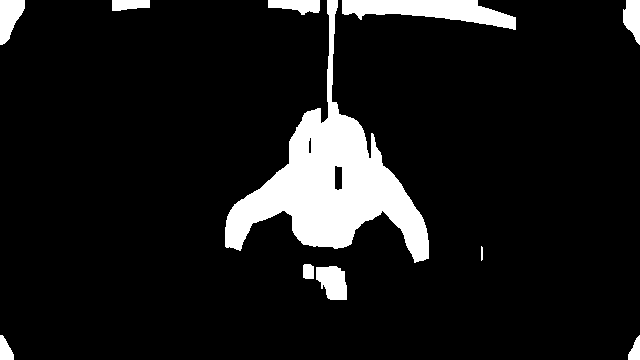

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,10))
morph3 = cv2.morphologyEx(morph2, cv2.MORPH_CLOSE, kernel, iterations=1)
cv2_imshow(morph3)

11


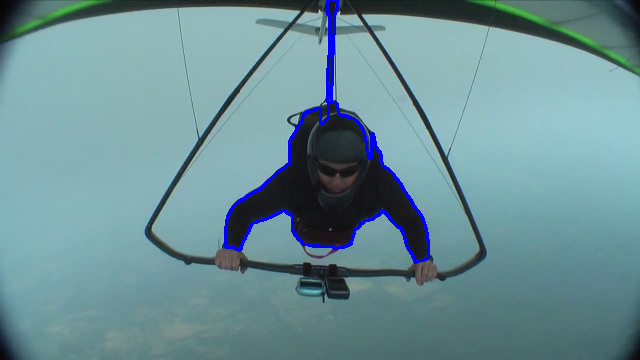

In [ ]:
contours, h = cv2.findContours(morph3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours = sorted(contours, reverse=True, key=cv2.contourArea)
print(len(contours))

img_copy = img2.copy()
cv2_imshow(cv2.drawContours(img_copy, sorted_contours, 0, (255, 0, 0), 2))

### Head Detection

We are using different arguments to have a heavier noise filtering for head detection.

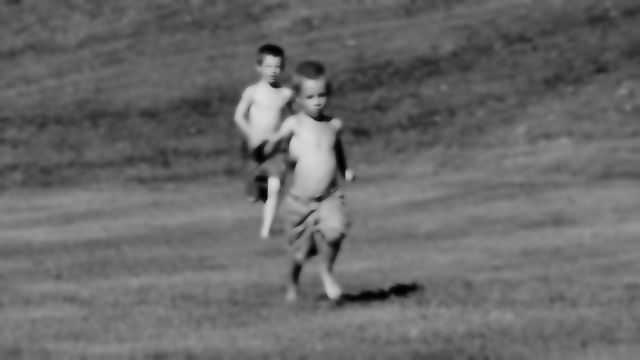

In [ ]:
img1_blur = cv2.bilateralFilter(img1_gray, 9, 85, 85)
cv2_imshow(img1_blur)

In [ ]:
import numpy as np

In [ ]:
circles = cv2.HoughCircles(img1_blur, cv2.HOUGH_GRADIENT, 1, 45, param1=40, param2=21, minRadius=10, maxRadius=30)
circles

array([[[268.5,  55.5,  11.8],
        [306.5,  85.5,  17.2],
        [292.5, 211.5,  14.9]]], dtype=float32)

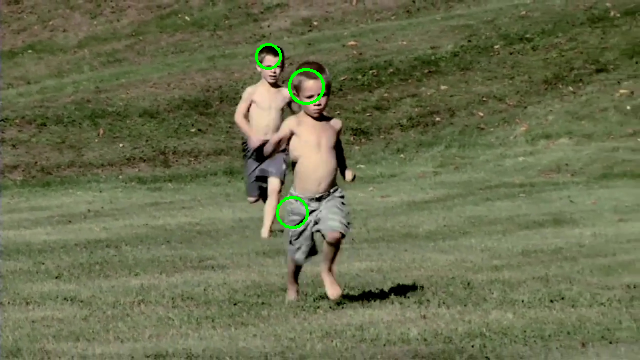

In [ ]:
circles = np.uint16(np.around(circles))
img1_copy = img1.copy()

for i in circles[0, :]:
  cv2.circle(img1_copy, (i[0], i[1]), i[2], (0, 255, 0), 2)
cv2_imshow(img1_copy)

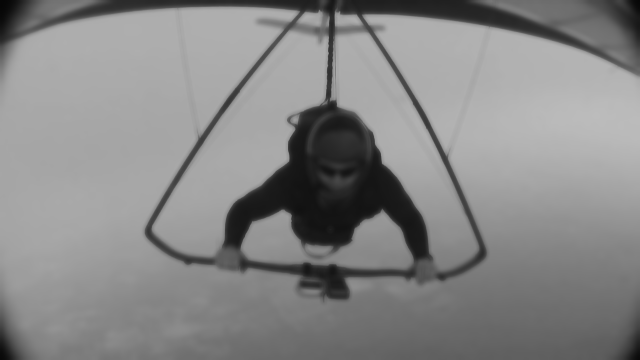

In [ ]:
img2_blur = cv2.bilateralFilter(img2_gray, 9, 85, 85)
cv2_imshow(img2_blur)

In [ ]:
circles = cv2.HoughCircles(img2_blur, cv2.HOUGH_GRADIENT, 1, 45, param1=40, param2=21, minRadius=10, maxRadius=30)
circles

array([[[341.5, 144.5,  29.4]]], dtype=float32)

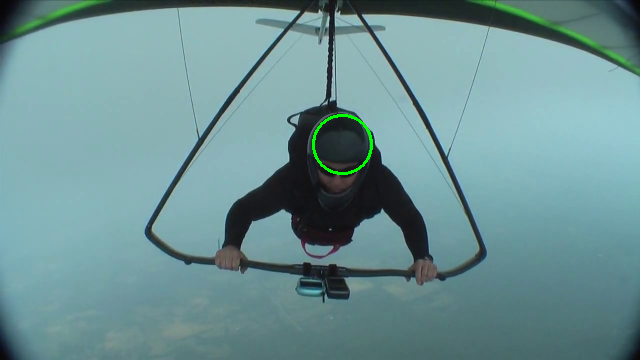

In [ ]:
circles = np.uint16(np.around(circles))
img2_copy = img2.copy()

for i in circles[0, :]:
  cv2.circle(img2_copy, (i[0], i[1]), i[2], (0, 255, 0), 2)
cv2_imshow(img2_copy)

## Future Work

After this, we can try minimize the false positives in our hough circles results due to the background.

## References

[1]	Z. Geng, C. Wang, Y. Wei, Z. Liu, H. Li, and H. Hu, ‘Human Pose as Compositional Tokens’, in CVPR, 2023.

[2]	B. Artacho and A. Savakis, ‘UniPose: Unified Human Pose Estimation in Single Images and Videos’, arXiv [cs.CV]. 2020.

[3]	M. Andriluka, L. Pishchulin, P. Gehler, and B. Schiele, ‘2D Human Pose Estimation: New Benchmark and State of the Art Analysis’, in IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2014.